In [54]:
import numpy as np
import pandas as pd
import time
import scipy
import random
import matplotlib.pyplot as plt
import itertools

In [4]:
#Importamos datos

df_distancias = pd.read_csv("Caso II - Matriz de Distancias.csv", delimiter= ",", index_col= 0)
dist_matrix = df_distancias.values
ubicacion_clientes = pd.read_csv("Caso II - Ubicacion Clientes.csv", delimiter= ",", index_col= 0)
datos_prueba = pd.read_csv("Caso II - Set de Datos.csv", delimiter= ",", index_col= 0)
test_data = datos_prueba.values

In [5]:
df_distancias

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
Cliente,,,,,,,,,,,,,,,
A,0.0,1.3,0.9,0.8,1.2,0.8,2.1,2.2,1.5,2.2,2.9,2.0,1.5,2.3,1.8
B,1.3,0.0,1.0,0.5,1.7,0.8,2.1,1.5,1.2,1.1,2.1,0.7,0.7,1.8,2.1
C,0.9,1.0,0.0,0.6,2.0,1.2,2.7,2.4,1.9,2.1,3.0,1.6,1.6,2.6,2.5
D,0.8,0.5,0.6,0.0,1.5,0.7,2.2,1.8,1.3,1.6,2.5,1.2,1.0,2.1,2.0
E,1.2,1.7,2.0,1.5,0.0,0.9,1.0,1.6,0.8,1.9,2.3,2.3,1.3,1.4,0.6
F,0.8,0.8,1.2,0.7,0.9,0.0,1.5,1.4,0.7,1.4,2.1,1.5,0.7,1.5,1.3
G,2.1,2.1,2.7,2.2,1.0,1.5,0.0,1.0,0.8,1.7,1.5,2.4,1.4,0.6,0.6
H,2.2,1.5,2.4,1.8,1.6,1.4,1.0,0.0,0.8,0.7,0.7,1.5,0.8,0.5,1.5
I,1.5,1.2,1.9,1.3,0.8,0.7,0.8,0.8,0.0,1.1,1.5,1.7,0.6,0.8,0.9


In [6]:
df_distancias

def llega(x):
   return True if x <= 2 else False

df_llega = df_distancias.applymap(llega)
df_llega

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
Cliente,,,,,,,,,,,,,,,
A,True,True,True,True,True,True,False,False,True,False,False,True,True,False,True
B,True,True,True,True,True,True,False,True,True,True,False,True,True,True,False
C,True,True,True,True,True,True,False,False,True,False,False,True,True,False,False
D,True,True,True,True,True,True,False,True,True,True,False,True,True,False,True
E,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True
F,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True
G,False,False,False,False,True,True,True,True,True,True,True,False,True,True,True
H,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True
I,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [7]:
ubicacion_clientes

,Coord x,Coord y
Cliente,,
A,0.3,1.8
B,1.5,2.1
C,0.7,2.6
D,1.0,2.1
E,0.6,0.7
F,1.0,1.5
G,1.4,0.0
H,2.2,0.8
I,1.4,0.9


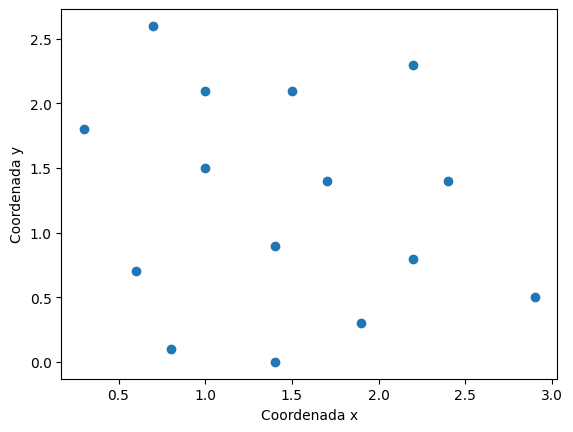

In [49]:
plt.scatter(x = ubicacion_clientes[' Coord x '], y = ubicacion_clientes[' Coord y '])
plt.xlabel("Coordenada x")
plt.ylabel("Coordenada y")
plt.show()

In [8]:
datos_prueba

,1,2,3,4,5,6,7,8,9,10
Cliente,,,,,,,,,,
A,4,3,5,2,6,6,6,5,5,1
B,6,6,5,4,1,3,7,6,4,7
C,1,6,6,2,6,7,5,1,4,5
D,8,6,5,2,8,2,2,2,5,7
E,4,1,2,4,2,3,2,6,3,6
F,3,1,6,8,6,5,5,3,5,8
G,3,2,3,7,4,3,3,8,4,4
H,5,8,5,2,4,8,4,2,7,1
I,5,2,3,4,2,6,1,4,5,7


In [9]:
#DEFINIMOS CONSTANTES

TARIFA_PROMEDIO = 1200

DEFINO FUNCION PARA SABER SI ES POSIBLE SERVIR A DOS CLIENTES


In [51]:
def cliente_posible(i, lista_clientes):
    posible = True
    for cc in lista_clientes:
        distancia_ok = df_llega.loc[cc,i].item()
        posible = posible == distancia_ok
    return posible

Defino la clase CAMION:

tiene un parametro, pedidos.
- Pedidos es del tipo Serie y lleva en el index los clientes y en los values las toneladas de ese cliente
-Tiene dos métodos:
    - Tons calcula la cantida de toneladas que lleva
    - Costo calcula el costo del camion, en caso de que le sean asignadas más de 12 toneladas, asume que solamente reparte 12 toneladas y el resto va a un precio de $3000/ton 


In [10]:
#definimos camion
class Camion:
    def __init__(self, pedidos):
        self.pedidos = pedidos #El camion contiene los pedidos que son un series
   
    def tons(self): #Calcula las toneladas que tiene el camión
        tons = 0
        for ton in self.pedidos.values:
            tons += ton
        return tons
    def llega_clientes(self):
        clientes = self.pedidos.index.to_list()
        

    def costo(self): #Computa el costo de forma que en caso de tener >12 tons se cobra 3mil por tonelada extra
        tons = self.tons()
        costo = float(0)
        if (tons == 0):
            costo = 5000
        elif (tons < 4):
            costo = 5600
        elif (tons < 6.5):
            costo = tons * 1400
        elif (tons < 9.5):
            costo = tons * 1200
        elif (tons < 12):
            costo = tons * 1000
        else:
            costo = 12000 + (tons - 12)  * 3000
        return costo


In [137]:
#Verificar las distancias de a pares en caso de tener 3 clientes

clientes = ['O', 'K', 'A']
pairs = np.array(list(itertools.combinations(clientes, 2)))
print(pairs)
pair = pairs[0]
sum = 0
dist_ok = []
for pair in pairs:
    dist_ok.append(df_llega.loc[pair[0], pair[1]])
dist_ok = np.array(dist_ok)
#En caso de que haya dos parejas de clientes a los que no llega (peor caso)
print(dist_ok)

pairs_ok = pairs[dist_ok] #Me devuelve la pareja que no tiene conflicto

print(pairs_ok)
print(type(pairs_ok[0].tolist()))

tons1 = datos_prueba.loc[pairs_ok[0][0], '1']
tons2 = datos_prueba.loc[pairs_ok[0][1], '1']

print(tons1, tons2)

cliente_3 = list(set(clientes) - set(pairs_ok[0]))

print("CLIENTE 3",type(cliente_3))

tons3 = datos_prueba.loc[cliente_3[0], '1']
print('tons 3',tons3)
#----------Termina el caso 2 parejas que no llega------------
if (tons3 >= tons1 + tons2):
    print('delete 1 y 2')
else:
    print("delete 3")

caso = dist_ok.count(True)
cantidad_de_clientes = len(clientes)
if (caso == 3):
    print(True)
elif (caso == 0):
    print('Buscar el de mayor tons')
elif (caso == 1):
    print(pairs)

[['O' 'K']
 ['O' 'A']
 ['K' 'A']]
[False  True False]
[['O' 'A']]
<class 'list'>
0 4
CLIENTE 3 <class 'list'>
tons 3 1
delete 3


SyntaxError: 'break' outside loop (3002877581.py, line 36)

In [27]:
cliente_posible('A', ['J','I'])

False

In [13]:
pedidos_A_B_dia1 = datos_prueba.loc[['A','B'], ['1']]['1']
print(type(pedidos_A_B_dia1)) #Verifico que sea del tipo pandas series
camion = Camion(pedidos_A_B_dia1) #Creo una instancia de camion
print(type(camion)) # Imprimo el tipo de camion (Camion)
print("El camión reparte ", camion.tons(), " toneladas") #Imprimo las tons totales del camion
print("El costo del camion es: $",camion.costo()) #Imprimo el costo del camion



<class 'pandas.core.series.Series'>
<class '__main__.Camion'>
El camión reparte  10  toneladas
El costo del camion es: $ 10000


In [ ]:
#Genero una matriz booleana de distancias > 2 True
bool_dist_matrix = dist_matrix > 2 #PONE TRUE SI EL RECORRIDO NO ES POSIBLE

In [ ]:
#Inicializar clientes

clientes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

Prueba


In [30]:
clientes = datos_prueba[datos_prueba['1'] > 0].index
clientes = clientes.tolist()
clientes.pop()
print(type(clientes))
print(clientes)


<class 'list'>
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']


AGREGAR PARA VER SI PUEDE REPARTIR A LOS CLIENTES O ESTAN A MAS DE 2 KM
    -Asigna los clientes de manera aleatoria
    - Genera los camiones
    - Calcula el costo de cada camion
    - Calcula el costo total
    - Calcula el costo por tonelada


In [50]:
#ASIGNA LOS CLIENTES ALEATORIAMENTE A LOS CAMIONES SIN REVISAR SI PUEDEN REALIZAR EL PEDIDO O NO
#AGREGAR PARA QUE CHEQUEE SI LOS PUEDE REPARTIR O NO!!!
#clientes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'] #Lista con los clientes para ese día
clientes = datos_prueba[datos_prueba['1'] > 0].index
clientes = clientes.tolist()
clientes.pop()

cc1 = []; cc2 = []; cc3 = []; cc4 = []; cc5 = []; cc6 = []; #inicializo los clientes para cada camión
clientes_camion = [cc1, cc2, cc3, cc4, cc5, cc6] #Armo la lista con los pedidos de los camiones por cliente

#q = len(clientes) #Guardo la cantidad de clientes en una variable q para usar en el range del for

#For para asignar los pedidos aleatoriamente
for i in range(len(clientes)): #Recorro toda la lista de clientes para ese dia
    cliente = clientes.pop() #Elimino el ultimo cliente de la lista de clientes a la vez que le asigno el cliente eleiminado a la variable cliente
    rand = random.randint(0, 5) #genero un numero aleatorio entero del 0 al 5
    if len(clientes_camion[rand]) < 3: #Verifico que el camion no tenga 3 clientes
        #Comparo que no haya más de 2 kilometros de distancia entre clientes
        clientes_camion[rand].append(cliente) #Asigno el cliente al camion del numero aleatorio
    else: #Si el camion ya tiene 3 clientes
        while True: #Loop infinito hasta asignar el pedido a un camion disponible
            rand_new = random.randint(0, 5) #Genero un nuevo numero aleatorio
            if rand_new != rand and len(clientes_camion[rand_new]) < 3: #Si el numero no es el mismo de antes(camion ya lleno) y además el nuevo camión seleccionado tampoco
                clientes_camion[rand_new].append(cliente) #Asigno el pedido al camión
                break
print("Asignacion de cliente por camión:", clientes_camion)

camiones = [] #Inicializo las lista de los camiones
día = '1' #Elijo el dia del modelo de prueba

for camion in clientes_camion: #Recorro los clientes por camion
    pedidos = datos_prueba.loc[camion,['1']] #Selecciono los pedidos de ese cliente(las tons)
    camiones.append(Camion(pedidos)) #Creo un camion nuevo con ese pedido y lo agrego a la lista de clientes

costo_camiones = np.array([]) #Creo un array vacio para llenar con el costo de los camiones

for camion in camiones: #Calculo el costo por camión
    costo_camiones = np.append(costo_camiones,camion.costo())

print(costo_camiones) #imprimo el array del costo por camion
costo_total = sum(costo_camiones) #Asigno Costo total diario
print(costo_total) #Imprimo el costo total diario

tons_totales = datos_prueba.loc['Total', ['1']] #Selecciono la toneladas totales para ese dia

costo_por_ton = costo_total/tons_totales #Calculo el costo por tonelada
    
print("El costo por tonelada es: ", int(costo_por_ton.iloc[0])) #Imprimo le costo por tonelada

Asignacion de cliente por camión: [[], ['J', 'G', 'F'], ['L', 'A'], ['I', 'H', 'E'], ['D', 'B'], ['K', 'C']]
[ 5000.  8400. 10000. 18000. 18000.  5600.]
65000.0
El costo por tonelada es:  1382


1    1174.468085
Name: Total, dtype: float64
